# Reduccion de Dimensionalidad

Cristobal Donoso Oliva<br>
Universidad de Concepcion, Chile<br>
cridonoso@inf.udec.cl<br>


_Viernes 24 de Julio del 2021_

Version extendida de este tutorial en:  https://github.com/cridonoso/IntroToDataScience/blob/master/8-Dimensionality/ReduccionDimensionalidad.ipynb

### La Maldicion de la Dimensionalidad

> A medida que aumentamos la dimensionalidad de entrada, la cantidad de datos necesaria para generalizar correctamente crece exponencialmente. 

#### Que podemos hacer?
En general podemos utilizara dos enfoques (no excluyente):
- **Seleccion de Caractersticas**:
    - Eliminar columnas con missing values
    - Eliminar columnas cuya varianza es cercana a 0 
    - Eliminar columnas que esten altamente correlacionadas con otras
    - Eliminar columnas utilizando el criterio de importancia de un Random Forest
- **Reduccion de dimensionalidad**:
    - Transformar (linear o no lineal) nuestra matriz de entrada $\boldsymbol{x} \in \mathbb{R}^M$ para crear un conjunto de nuevas variables $\boldsymbol{x'} \in \mathbb{R}^D$ tal que $D < M$
    - Intuitivamente, creamos nuevas *variables resumen* que explican las **caracteristicas mas importantes** del conjunto original.
    
Reducir la dimensionalidad permite:
- Evitar el sobreajuste (cuando la cantidad de datos es menor que la cantidad de descriptores)
- Disminuir la complejidad (espacial y temporal) de nuestro algoritmo.
- Visualizar espacios multidimensionales i.e., mayor a 3.

En este tutorial nos concentraremos en el enfoque de **Reduccion de Dimensionalidad**

### Principal Components Analysis (PCA)
La idea detras de PCA es **maximizar la varianza** utilizando un subconjunto de **componentes** que describen el conjunto de datos.

**Que son las componentes? Como se calculan?**
![asd](./figures/pca_axis.gif)

1. Sabemos que cualquier **rotacion preserva el orden relativo** o configuracion de los datos.
2. Por lo tanto, utilizamos **rotaciones para maximizar la capacidad discriminativa** entre los datos.
3. Esto se logra al **Maximizar la varianza** a lo largo de los ejes resultantes.
4. PCA realiza **transformaciones lineales** que proyectan los datos en un conjunto de **ejes ortogonales** (componentes principales)
5. Finalmente, se **ordenan las componentes** en funcion de la **varianza** explicada en ellos.

Si los datos tienen **distintas escalas** es posible que PCA de **mas enfasis** a aquellas variables que tienen **mayor varianza**:
> Por ejemplo, una variable cuya unidad de medida esta en horas, tendra una menor varianza con respecto a una variable que este en segundos, pese a que esten describiendo el mismo cambio. Aun cuando tengan la misma unidad de medida si la escala es distinta, digamos 150-300 y 1-3, PCA va a pesar mas los valores de la primera variable.

Para evitar este problema, es muy importante **normalizar** los datos **antes de aplicar PCA**

### Generando datos sinteticos

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
# from util import *
%matplotlib notebook

In [4]:
dat3 = np.fromfile('./data/dat3.dat', dtype=np.float32, sep='\n').reshape((1600,3))
labels = np.fromfile('./data/preswissroll_labels.dat', sep='\n')

Primero debemos normalizar cada columna por separado

In [5]:
feature1 = (dat3[:, 0]-np.mean(dat3[:, 0]))/np.std(dat3[:, 0])
feature2 = (dat3[:, 1]-np.mean(dat3[:, 1]))/np.std(dat3[:, 1])
feature3 = (dat3[:, 2]-np.mean(dat3[:, 2]))/np.std(dat3[:, 2])

scaled_data = np.vstack([feature1, feature2, feature3]).T

<IPython.core.display.Javascript object>


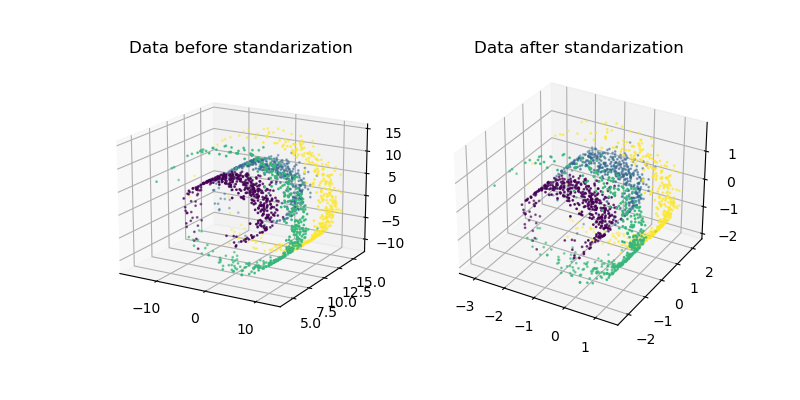

In [6]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(dat3[:,0], dat3[:,1], dat3[:,2], c = labels, s=1)
plt.title('Data before standarization')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(scaled_data[:,0], scaled_data[:,1], scaled_data[:,2], c = labels, s=1)
plt.title('Data after standarization')
plt.show()

Ahora podemos utilizar `PCA` desde el paquete `sklearn.decomposition`

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
xx = pca.transform(scaled_data)

<IPython.core.display.Javascript object>


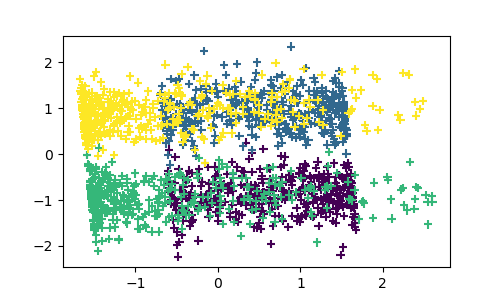

In [9]:
plt.figure(figsize=(5,3))
plt.scatter(xx[:,0], xx[:,1], c=labels, marker='+')
plt.show()

## Linear Discriminant Analysis (LDA)
### Analisis Discriminante Lineal

LDA busca **maximizar la separabilidad** entre **categorias conocidas** (a diferencia de PCA que busca maximizar la varianza de las proyecciones sin utilizar informacion de las categorias)

Para crear un **nuevo eje** sobre el cual proyectar los datos LDA utiliza dos criterios:
- **Maximizar la distancia** entre las **medias** de las categorias
- **Minimizar la variacion** dentro de cada categoria

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda = lda.fit(scaled_data, labels)
X_r2 = lda.transform(scaled_data)
np.unique(labels)

array([1., 2., 3., 4.])

<IPython.core.display.Javascript object>


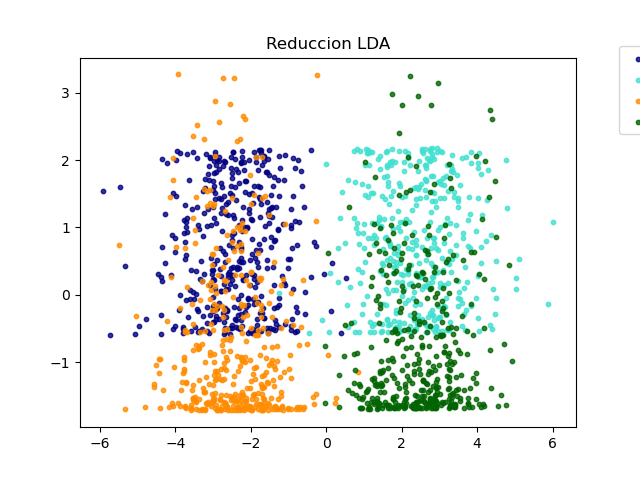

In [13]:
colors = ['navy', 'turquoise', 'darkorange', 'darkgreen']

plt.figure()
for color, i, target_name in zip(colors, [1, 2, 3, 4], ['clase 1', 'clase 2', 'clase 3', 'clase 4']):
    plt.scatter(X_r2[labels == i][:, 0], X_r2[labels == i][:, 1], alpha=.8, color=color,
                label=target_name, s=10)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Reduccion LDA')

plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show()

# [BONUS] t-Distributed stochastic neighbor embedding (t-SNE)

Al igual que PCA t-SNE es una tecnica de reduccion de dimensionalidad no-supervisada.

PCA es un tecnica de reduccion de dimensionalidad lineal y determinista, la cual preserva la mayor varianza en las proyecciones.

tSNE es un algoritmo de reduccion de dimensionalidad no lineal y estocastico el cual es utilizado solo para visualizacion.

Preserva la estructura local de los datos utilizando la distribucion t de Student sobre las distancias en una alta dimensionalidad. Luego, trata de mantener esa probabilidad en el espacio reducido.

t-SNE es invariante a los outliers

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE (n_components = 2)
y_tsne = tsne.fit_transform(scaled_data)

<ipython-input-17-f1b21948567d>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(155)


<IPython.core.display.Javascript object>


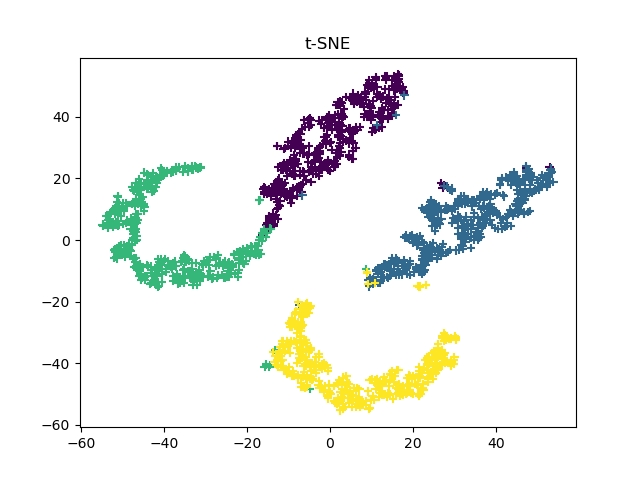

In [17]:
ax = fig.add_subplot(155)
plt.scatter(y_tsne[:,0], y_tsne[:,1], c=labels, marker='+')
plt.title('t-SNE')
plt.show()

Las conclusiones que podemos sacar de t-sne no son directas. Para un correcto uso de t-sne [revisa esta articulo](https://distill.pub/2016/misread-tsne/)

**UMAP** es una extension de t-sne pero mas rapido en ejecucion y con mejores propiedades topologicas [aqui puedes revisar una guia comparativa](https://pair-code.github.io/understanding-umap/)